In [74]:
cars = pd.read_csv("lsd_night_b_tr.csv")
cars = cars.groupby("o").agg({"o" : "count", "t" : "min"})
cars.rename(columns = {"o" : "n", "t" : "tmin"}, inplace = True)
cars.query("n >= 10", inplace = True)
cars = cars.groupby("tmin").count().n

In [80]:
det_per_min = pd.Series({t / 1800 : cars[(t <= cars.index) & (cars.index < t + 1800)].sum()
                        for t in range(cars.index.max() - 1800)} )

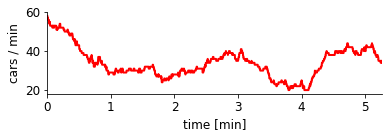

In [91]:
ax = det_per_min.plot(figsize = (6, 1.5), color = "red")
ax.set_xlabel("time [min]")
ax.set_ylabel("cars / min", labelpad = 5)


ax.figure.savefig("cars_per_minute.pdf")

In [70]:
det_per_min

det_per_min.plot()

Series([], dtype: float64)

In [64]:
cars.rolling(50, on = "tmin").sum()

,tmin,n
0,1,NaN
1,15,NaN
2,41,NaN
3,49,NaN
4,68,NaN
5,72,NaN
6,137,NaN
7,177,NaN
8,248,NaN
9,249,NaN


In [47]:
pd.read_csv("lsd_night_b_tr.csv")

,x,y,t,ts,o,area,conf
0,1446.964151,407.757195,1,NaN,0,21944.454767,0.789062
1,1428.052786,387.141572,2,NaN,0,18119.983262,0.789062
2,1415.139136,379.946161,3,NaN,0,16465.464931,0.894531
3,1404.377723,364.949021,4,NaN,0,16730.329526,0.894531
4,1388.235631,350.868705,5,NaN,0,15202.709319,0.894531
5,1371.476561,339.469507,6,NaN,0,15202.705952,0.832031
6,1362.867442,323.433299,7,NaN,0,11406.963722,0.894531
7,1355.334470,319.023288,8,NaN,0,13380.613916,0.894531
8,1342.420763,303.384796,9,NaN,0,10201.304447,0.832031
9,1324.585602,301.139517,10,NaN,0,10365.407459,0.691406


In [60]:
cars.rolling(50).sum()

tmin
1         NaN
15        NaN
41        NaN
49        NaN
68        NaN
         ... 
10991    50.0
11072    50.0
11140    50.0
11246    50.0
11288    50.0
Name: n, Length: 223, dtype: float64

In [15]:
detections = cars.groupby("frame").frame.count()

KeyError: 'frame'

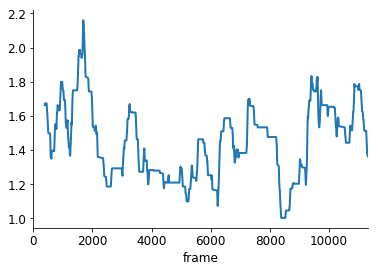

In [13]:
detections.rolling(5 * 60).mean().plot()